# Linear Regression - Spark foundation internship module 
    completed task 1

### Mayur V Kolki 
### Data Scientist , Pune, India

In [1]:
Scores =[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]

In [2]:
Hours = [2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8]

In [3]:
Hours

[2.5,
 5.1,
 3.2,
 8.5,
 3.5,
 1.5,
 9.2,
 5.5,
 8.3,
 2.7,
 7.7,
 5.9,
 4.5,
 3.3,
 1.1,
 8.9,
 2.5,
 1.9,
 6.1,
 7.4,
 2.7,
 4.8,
 3.8,
 6.9,
 7.8]

In [4]:
#import libraries
import pandas as pd
import numpy as np

data = pd.DataFrame({'Hours':Hours,"Scores":Scores})
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#cross- validation
from sklearn.model_selection import train_test_split ,KFold

In [6]:
#OLS library for linear regression
import statsmodels.api as sm

In [7]:
#visualisation
import pylab
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
#
import scipy.stats as stats

In [10]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
from sklearn.feature_selection import  f_regression

In [12]:
data.shape

(25, 2)

In [13]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [15]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [16]:
#check for 0
data[data==0].count()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

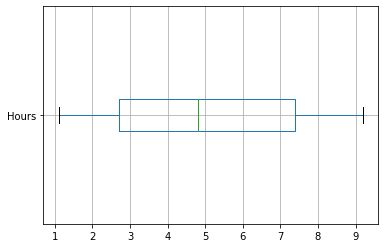

In [17]:
#outliers
data.boxplot('Hours',vert=False)

In [18]:
len(data)

25

In [19]:
from scipy.stats import normaltest
cols = list(data.columns)
cols.remove('Scores')
#create a K-v  pair to store column names and its corresponding distribution type (Normal/NOt normal)

aptest = {}

for c in cols:
    tstat,pval = normaltest(data[c])
    if pval< 0.05:
        aptest[c] = "not Normal Test"
    else:
        aptest[c] = "Normal"

In [20]:
aptest

{'Hours': 'Normal'}

In [21]:
trainx,testx,trainy,testy = train_test_split(data.drop('Scores',axis=1),data['Scores'],test_size =0.3)

In [22]:
print("trainx={},trainy={},testx={},testy ={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(17, 1),trainy=(17,),testx=(8, 1),testy =(8,)


In [23]:
testy

20    30
5     20
7     60
11    62
8     81
17    24
23    76
16    30
Name: Scores, dtype: int64

In [24]:
#regression model building
#OLS-> Ordinary Least Square method
m1=  sm.OLS(trainy,trainx).fit()

In [25]:
#summarise the model
m1.summary()

C:\Users\mayur\anaconda3\envs\TensorFlow\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Scores   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              1548.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):                    2.37e-17
Time:                        09:00:39   Log-Likelihood:                         -54.473
No. Observations:                  17   AIC:                                      110.9
Df Residuals:                      16   BIC:                                      111.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hours         10.0372      0.255     39.339      0.000       9.496      10.578
==============================================================================
Omnibus:                        5.905   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                1.618
Skew:                           0.163   Prob(JB):                        0.445
Kurtosis:                       1.524   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Add a constant term to the trainx and testx
#this will ensure that the model summary has the 'intercept' term displayed
trainx =  sm.add_constant(trainx)
testx  = sm.add_constant(testx)

In [27]:
#Linear Regression model building 
#OLS-> 
m2=sm.OLS(trainy,trainx).fit()

In [28]:
#summarise the model 
m2.summary()

C:\Users\mayur\anaconda3\envs\TensorFlow\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     257.4
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           7.48e-11
Time:                        09:00:39   Log-Likelihood:                -54.472
No. Observations:                  17   AIC:                             112.9
Df Residuals:                      15   BIC:                             114.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1181      3.661     -0.032      0.975      -7.921       7.685
Hours         10.0556      0.627     16.044      0.000       8.720      11.391
==============================================================================
Omnibus:                        5.720   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                1.593
Skew:                           0.157   Prob(JB):                        0.451
Kurtosis:                       1.533   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#validation of LR assumptions
#1) mean of residuals =0
print(m1.resid.mean())
print("\n")
print(m2.resid.mean())

-0.0208849033433297


-8.254834724271753e-15


In [30]:
m1.rsquared

0.9897670265686673

In [31]:
m2.rsquared

0.9449391336785301

In [32]:
m1.rsquared_adj

0.9891274657292091

In [33]:
m2.rsquared_adj

0.9412684092570988

In [34]:
#bruesch-pagan test against hetroscedasticity
import statsmodels.stats.api as sms

#H0: homoscedasticity
#H1:  hetroscedasticity

#return value of breusch pagan
#lagrange_multiplier , pvalue, fscore, fp-value

#parameters: [residuals,x-arrays]
pval = sms.het_breuschpagan(m1.resid,m1.model.exog)[1]

if pval<0.05:
    print("Reject H0. Model is Heteroscedastic")
else:
    print("FTR H0. Model is Homoscedastic")


FTR H0. Model is Homoscedastic


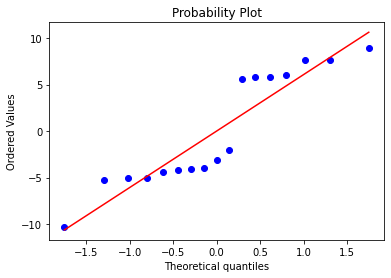

In [35]:
#3) residuals have a normal distribution
stats.probplot(m2.resid,dist='norm',plot=pylab)
pylab.show()

In [36]:
#prediction on the test data
p1=m2.predict(testx)
p1

20    27.031942
5     14.965236
7     55.187588
11    59.209823
8     83.343235
17    18.987471
23    69.265411
16    25.020824
dtype: float64

In [37]:
#MSE of model 1 
mse1= round(mean_squared_error(testy,p1),3)
print('MSE = {}'.format(mse1))


MSE = 20.733


In [38]:
testy

20    30
5     20
7     60
11    62
8     81
17    24
23    76
16    30
Name: Scores, dtype: int64

In [39]:
testy.shape

(8,)

In [40]:
#store the actual amd predicted data for comparison
df=  pd.DataFrame({'actual':testy,'predicted':round(p1,3)})
df

,actual,predicted
20,30,27.032
5,20,14.965
7,60,55.188
11,62,59.210
8,81,83.343
17,24,18.987
23,76,69.265
16,30,25.021


C:\Users\mayur\anaconda3\envs\TensorFlow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mayur\anaconda3\envs\TensorFlow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

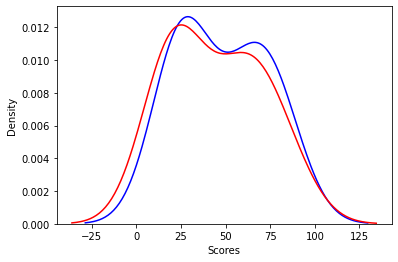

In [41]:
#plot the actual and predicted values
ax1=sns.distplot(testy,hist=False,color='blue',label ='Actual')
sns.distplot(p1,hist=False,color='red',label='predicted',ax=ax1)

In [42]:
mse1

20.733

In [43]:
import math

math.sqrt(mse1)

4.5533504148044655